In [1]:
import rasterio
import rasterio.mask
import json
import os
import matplotlib.pyplot as plt 
import geopandas as gpd
import pandas as pd
import fiona 

from rasterstats import zonal_stats 
from rasterio.plot import show, show_hist

In [9]:

lst_stats = pd.read_json('stats/lst_stats.json')

In [10]:
lst_stats.head(10)


,mean,std,min,max,date
LT05_184030_19990415,21.376584,6.076947,-3.319575,43.257784,1999-04-15
LE07_184030_19990930,23.800709,4.523431,11.268534,42.464803,1999-09-30
LT05_184030_20000128,-5.675374,2.864131,-16.496042,7.744556,2000-01-28
LE07_184030_20000527,31.675817,6.584740,13.076667,63.147242,2000-05-27
LE07_184030_20000612,30.259851,6.134779,17.540601,59.055872,2000-06-12
LE07_184030_20000628,29.195076,7.260053,11.760729,55.326812,2000-06-28
LE07_184030_20010919,0.460359,15.906680,-23.509819,41.941846,2001-09-19
LT05_184030_20050210,-8.998039,2.396483,-18.526346,6.784092,2005-02-10
LT05_184030_20060504,20.010414,5.110809,-1.422574,40.386647,2006-05-04
LT05_184030_20060520,30.101013,5.477231,3.571153,57.750188,2006-05-20


In [11]:
lst_stats.columns

Index(['mean', 'std', 'min', 'max', 'date'], dtype='object')

In [12]:
# lets get rid of the index and name the index column 'id'
lst_stats.reset_index(inplace=True)
lst_stats.rename(columns={'index':'id'}, inplace=True)


In [13]:
id_df = pd.read_json('./data/id_list.json')

In [17]:
# from datetime import datetime
# id_df['date'] = id_df['id'].apply(lambda x: datetime.strptime(x.split('_')[-1], "%Y%m%d"))
# id_df = id_df[['id', 'collection', 'tier', 'season', 'date', 'ghs']]

In [18]:
# id_df = id_df.sort_values(by='date')

In [19]:
id_df.head(10)

,id,collection,tier,season,date,ghs
2,LT05_184030_19990415,LT05,T1,spring,1999-04-15,JRC/GHSL/P2023A/GHS_POP/2000
0,LE07_184030_19990930,LE07,T1,autumn,1999-09-30,JRC/GHSL/P2023A/GHS_POP/2000
6,LT05_184030_20000128,LT05,T2,winter,2000-01-28,JRC/GHSL/P2023A/GHS_POP/2000
3,LE07_184030_20000527,LE07,T1,spring,2000-05-27,JRC/GHSL/P2023A/GHS_POP/2000
4,LE07_184030_20000612,LE07,T1,summer,2000-06-12,JRC/GHSL/P2023A/GHS_POP/2000
5,LE07_184030_20000628,LE07,T1,summer,2000-06-28,JRC/GHSL/P2023A/GHS_POP/2000
1,LE07_184030_20010919,LE07,T1,autumn,2001-09-19,JRC/GHSL/P2023A/GHS_POP/2000
13,LT05_184030_20050210,LT05,T1,winter,2005-02-10,JRC/GHSL/P2023A/GHS_POP/2005
9,LT05_184030_20060504,LT05,T1,spring,2006-05-04,JRC/GHSL/P2023A/GHS_POP/2005
10,LT05_184030_20060520,LT05,T1,spring,2006-05-20,JRC/GHSL/P2023A/GHS_POP/2005


In [19]:
# now lets join the two dataframes 
lst_stats = lst_stats.merge(id_df, on='id')

In [21]:
lst_stats.head(10)

,id,mean,std,min,max,date,collection,season,tier,ghs
0,LT05_184030_19990415,21.376584,6.076947,-3.319575,43.257784,1999-04-15,LT05,spring,T1,JRC/GHSL/P2023A/GHS_POP/2000
1,LE07_184030_19990930,23.800709,4.523431,11.268534,42.464803,1999-09-30,LE07,autumn,T1,JRC/GHSL/P2023A/GHS_POP/2000
2,LT05_184030_20000128,-5.675374,2.864131,-16.496042,7.744556,2000-01-28,LT05,winter,T2,JRC/GHSL/P2023A/GHS_POP/2000
3,LE07_184030_20000527,31.675817,6.584740,13.076667,63.147242,2000-05-27,LE07,spring,T1,JRC/GHSL/P2023A/GHS_POP/2000
4,LE07_184030_20000612,30.259851,6.134779,17.540601,59.055872,2000-06-12,LE07,summer,T1,JRC/GHSL/P2023A/GHS_POP/2000
5,LE07_184030_20000628,29.195076,7.260053,11.760729,55.326812,2000-06-28,LE07,summer,T1,JRC/GHSL/P2023A/GHS_POP/2000
6,LE07_184030_20010919,0.460359,15.906680,-23.509819,41.941846,2001-09-19,LE07,autumn,T1,JRC/GHSL/P2023A/GHS_POP/2000
7,LT05_184030_20050210,-8.998039,2.396483,-18.526346,6.784092,2005-02-10,LT05,winter,T1,JRC/GHSL/P2023A/GHS_POP/2005
8,LT05_184030_20060504,20.010414,5.110809,-1.422574,40.386647,2006-05-04,LT05,spring,T1,JRC/GHSL/P2023A/GHS_POP/2005
9,LT05_184030_20060520,30.101013,5.477231,3.571153,57.750188,2006-05-20,LT05,spring,T1,JRC/GHSL/P2023A/GHS_POP/2005


In [22]:
# lets group by season see trends for mean lst 

lst_stats.groupby('season')['mean'].mean()

season
autumn    20.339776
spring    24.804808
summer    30.928654
winter    -0.628140
Name: mean, dtype: float64

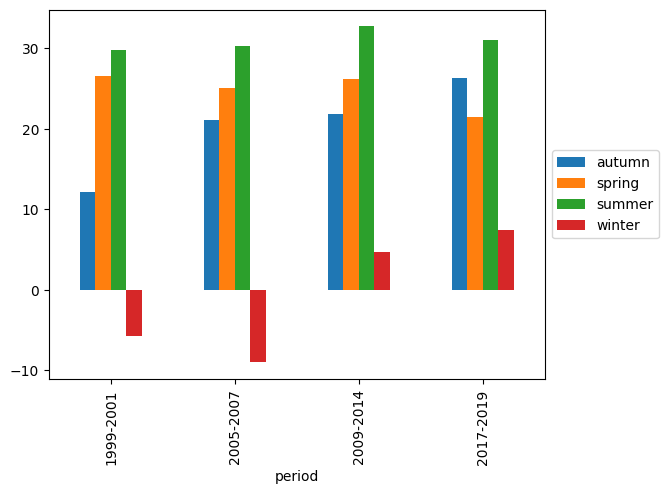

In [37]:
periods = {
    '1999-2001': (1999, 2001),
    '2005-2007': (2005, 2007),
    '2009-2014': (2009, 2014),
    '2017-2019': (2017, 2019)
}

# we want to save the results in a dataframe, and then plot them  
# we want to do that per period per season

stats_periods = []
for period, (start, end) in periods.items():
    for season in lst_stats['season'].unique():
        period_stats = lst_stats[(lst_stats['date'].dt.year >= start) & (lst_stats['date'].dt.year <= end) & (lst_stats['season'] == season)]
        stats_periods.append({
            'period': period,
            'season': season,
            'mean': period_stats['mean'].mean(),
            'std': period_stats['std'].mean(),
            'min': period_stats['min'].min(),
            'max': period_stats['max'].max()
        })

stats_periods_df = pd.DataFrame(stats_periods)
ax = stats_periods_df.pivot(index='period', columns='season', values='mean').plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



In [74]:
stats_periods_df.to_json('stats/stats_periods.json')

In [77]:
stats_periods_df

,period,season,mean,std,min,max
0,1999-2001,spring,26.526200,6.330844,-3.319575,63.147242
1,1999-2001,autumn,12.130534,10.215055,-23.509819,42.464803
2,1999-2001,winter,-5.675374,2.864131,-16.496042,7.744556
3,1999-2001,summer,29.727464,6.697416,11.760729,59.055872
4,2005-2007,spring,25.055714,5.294020,-1.422574,57.750188
5,2005-2007,autumn,21.126039,3.322570,8.021415,41.237734
6,2005-2007,winter,-8.998039,2.396483,-18.526346,6.784092
7,2005-2007,summer,30.219705,5.749389,12.505858,56.557299
8,2009-2014,spring,26.148264,5.234371,0.498353,52.776969
9,2009-2014,autumn,21.794385,3.813882,10.523406,43.001432


In [49]:
lst_stats.sort_values(by='date', inplace=True)

In [70]:
lst_stats['period'] = lst_stats['date'].dt.year.apply(
    lambda x: next((period for period, (start, end) in periods.items() if start <= x <= end), None)
)

lst_stats.groupby(['season', 'period', lst_stats['date'].dt.month])['date'].count()



season  period     date
autumn  1999-2001  9       2
        2005-2007  9       1
                   10      1
        2009-2014  9       1
                   10      1
        2017-2019  9       1
                   10      1
spring  1999-2001  4       1
                   5       1
        2005-2007  5       2
        2009-2014  3       1
                   5       1
        2017-2019  4       1
                   5       1
summer  1999-2001  6       2
        2005-2007  6       1
                   7       1
        2009-2014  8       2
        2017-2019  7       1
                   8       1
winter  1999-2001  1       1
        2005-2007  2       1
        2009-2014  2       1
        2017-2019  2       1
Name: date, dtype: int64

In [72]:
lst_stats.to_json('stats/lst_stats_with_period.json')